In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import statistics

In [7]:
# A1

data = pd.read_csv("D:\\WORK\\ML\\A4\\customer_churn.csv")
data.describe()
data.shape
data.isnull().sum()
data=data.dropna()
data.isnull().sum()

# Encode target variable based on price movement
data['Target'] = np.where(data['Balance'] > data['CreditScore'], 1, 0)

# Define features and target variable
X = data[['Balance']]
Y = data[['Target']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)

predictions = neigh.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(accuracy)


c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
[[1101    0]
 [   0 1899]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
1.0


In [6]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_stock_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name) 

def generate_random_predictions(actual_prices):
    # Generate random predictions for demonstration purposes
    np.random.seed(42)  # for reproducibility
    return actual_prices * (1 + 0.02 * np.random.randn(len(actual_prices)))

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_error(actual, predicted) / np.mean(np.abs(actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2
if __name__ == "__main__":
    # Load stock data from Excel file
    file_path = "D:\\WORK\\ML\\A3\\Lab Session1 Data.xlsx"
    df_stock = load_stock_data(file_path, sheet_name='CUSTOMER PRICE')

    # Assuming 'Price' column is the actual stock prices
    actual_prices = df_stock['Price']

    # Generate random predictions for demonstration purposes
    predicted_prices = generate_random_predictions(actual_prices)

    # Calculate metrics
    mse, rmse, mape, r2 = calculate_metrics(actual_prices, predicted_prices)

    # Display results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R2 Score: {r2}")

    # Analyze the results based on the obtained metrics
    # You can add your analysis based on the calculated metrics.
    # Lower MSE and RMSE values indicate better model performance.
    # Lower MAPE values indicate better accuracy.
    # Closer R2 score to 1 indicates a better fit.





Mean Squared Error (MSE): 921.7961868770038
Root Mean Squared Error (RMSE): 30.36109660201693
Mean Absolute Percentage Error (MAPE): 1.5226298052625966%
R2 Score: 0.9842418553819514


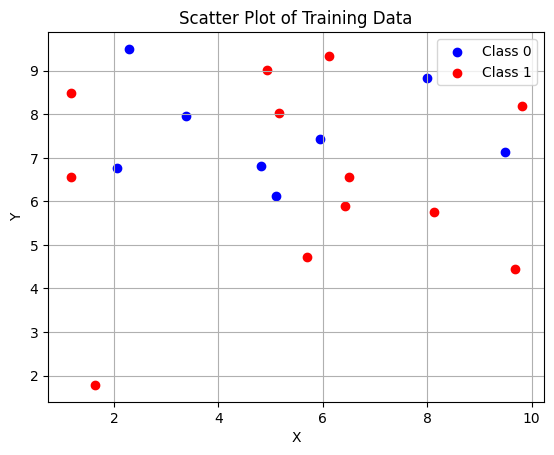

In [ ]:
# A3

# Generate random data points
np.random.seed(0)  # for reproducibility
num_points = 20
min_val = 1
max_val = 10
X = np.random.uniform(min_val, max_val, size=(num_points, 2))

# Assign classes
class_labels = np.random.randint(0, 2, size=num_points)

# Separate points by class
class_0_points = X[class_labels == 0]
class_1_points = X[class_labels == 1]

# Plot data points
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='red', label='Class 1')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

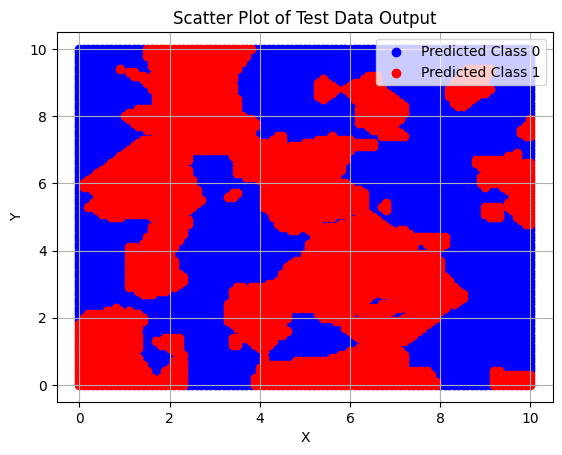

In [ ]:
# A4

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_data = np.array([[x, y] for x in x_values for y in y_values])

# Reshape test_data to have the same number of features as the training data
test_data = test_data.reshape(-1, 2)

# Create some example training data (replace this with your actual training data)
X_train = np.random.rand(100, 2) * 10  # Example: random training data
y_train = np.random.randint(2, size=100)  # Example: random binary labels

# Create and fit kNN classifier
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict classes for test data
predicted_classes = knn_classifier.predict(test_data)

# Separate points by predicted class
class_0_test_points = test_data[predicted_classes == 0]
class_1_test_points = test_data[predicted_classes == 1]

# Plot test data points with predicted classes
plt.scatter(class_0_test_points[:, 0], class_0_test_points[:, 1], color='blue', label='Predicted Class 0')
plt.scatter(class_1_test_points[:, 0], class_1_test_points[:, 1], color='red', label='Predicted Class 1')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data Output')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

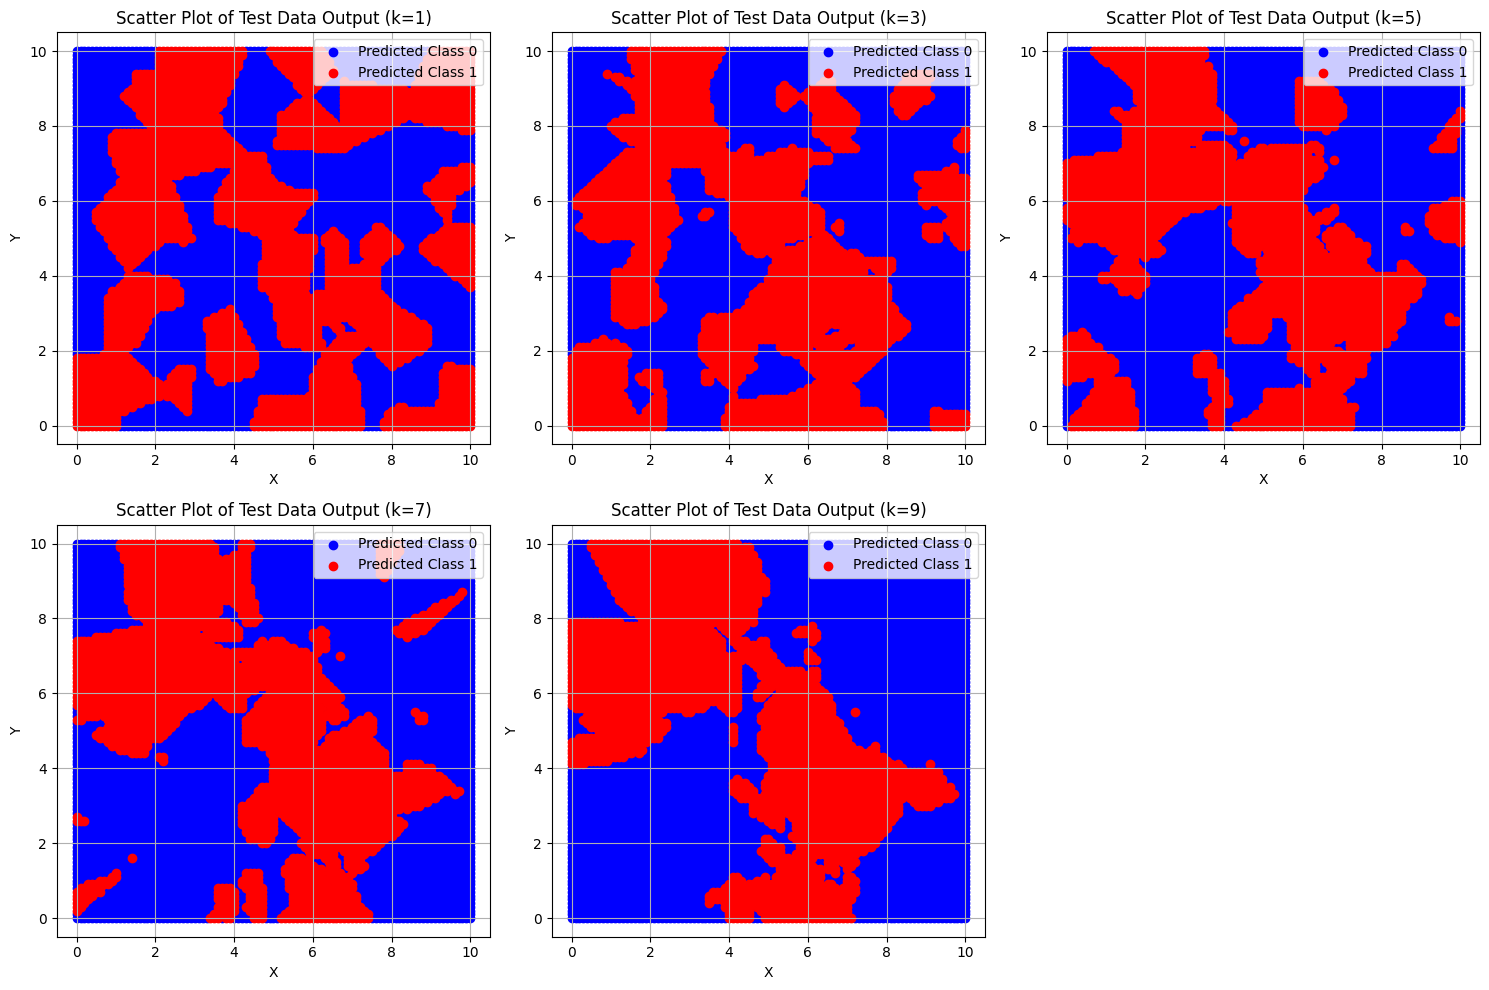

In [ ]:
# A5

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_data = np.array([[x, y] for x in x_values for y in y_values])

# Load or generate your training data and labels
# Assuming X_train and y_train are your training data and labels

# Define a range of k values to try
k_values = [1, 3, 5, 7, 9]

# Plot the test data output for each value of k
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    plt.subplot(2, 3, i)
    
    # Create and fit kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predict classes for test data
    predicted_classes = knn_classifier.predict(test_data)

    # Separate points by predicted class
    class_0_test_points = test_data[predicted_classes == 0]
    class_1_test_points = test_data[predicted_classes == 1]

    # Plot test data points with predicted classes
    plt.scatter(class_0_test_points[:, 0], class_0_test_points[:, 1], color='blue', label='Predicted Class 0')
    plt.scatter(class_1_test_points[:, 0], class_1_test_points[:, 1], color='red', label='Predicted Class 1')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter Plot of Test Data Output (k={k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\BHOGA SAI VIVEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeigh

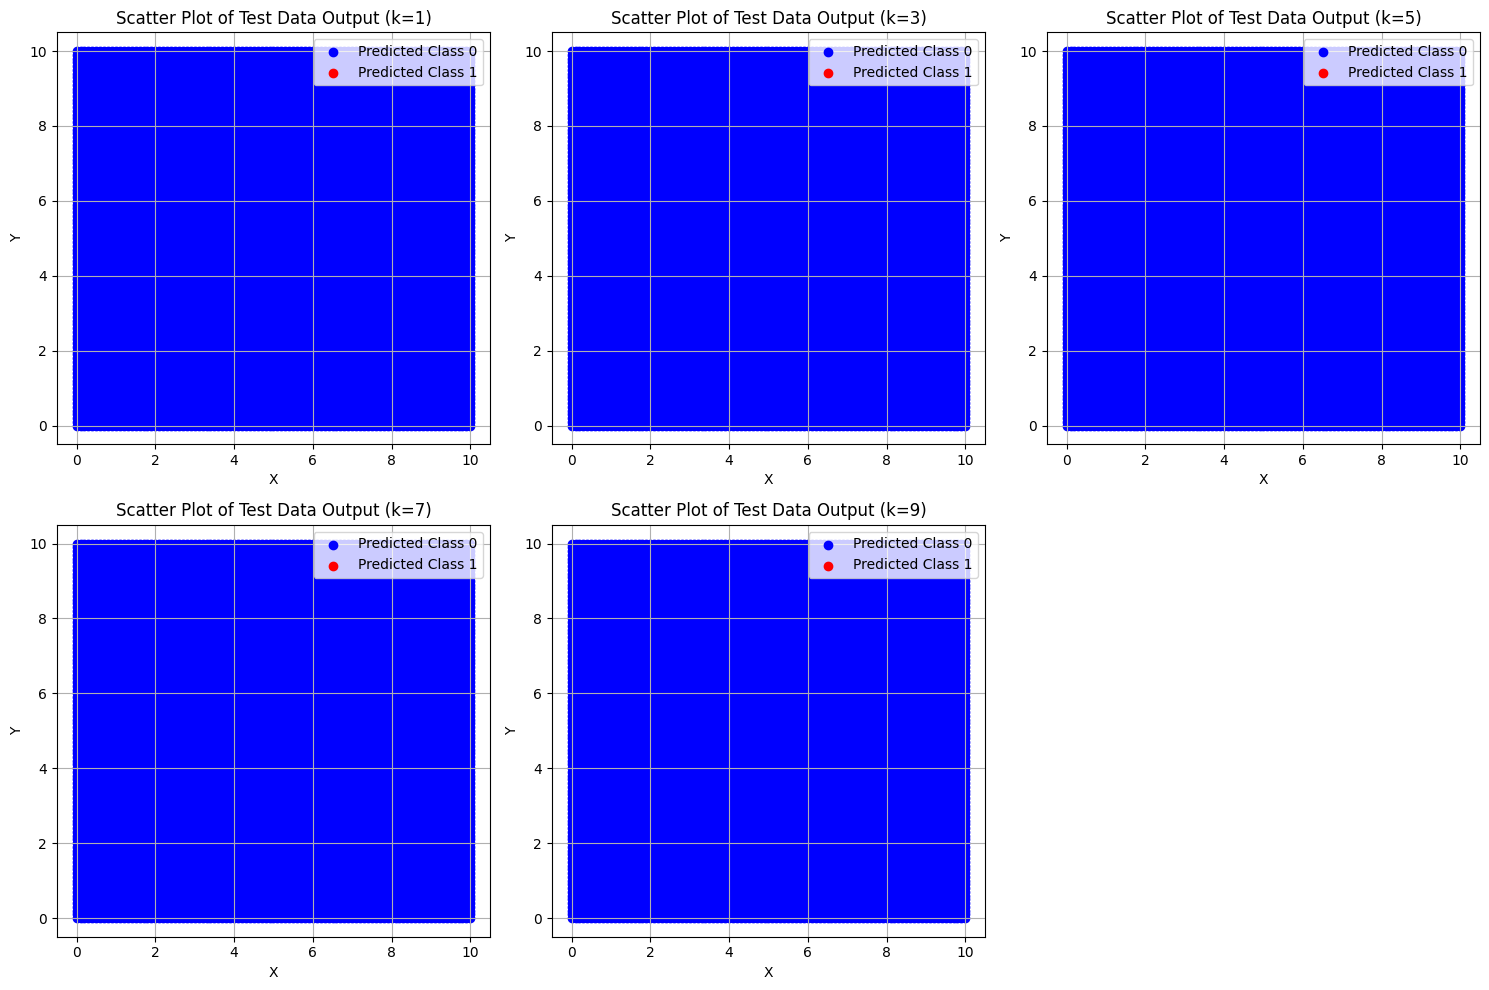

In [13]:
# A5

# Generate test set data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_data = np.array([[x, y] for x in x_values for y in y_values])

# Load or generate your training data and labels
# Assuming X_train and y_train are your training data and labels

# Define a range of k values to try
k_values = [1, 3, 5, 7, 9]

# Plot the test data output for each value of k
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    plt.subplot(2, 3, i)
    
    # Create and fit kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predict classes for test data
    predicted_classes = knn_classifier.predict(test_data)

    # Separate points by predicted class
    class_0_test_points = test_data[predicted_classes == 0]
    class_1_test_points = test_data[predicted_classes == 1]

    # Plot test data points with predicted classes
    plt.scatter(class_0_test_points[:, 0], class_0_test_points[:, 1], color='blue', label='Predicted Class 0')
    plt.scatter(class_1_test_points[:, 0], class_1_test_points[:, 1], color='red', label='Predicted Class 1')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter Plot of Test Data Output (k={k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# A7

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


data = load_iris()
X_train = data.data
y_train = data.target

param_grid = {'n_neighbors': np.arange(1, 21)}  # searching for k from 1 to 20

# Create kNN classifier
knn_classifier = KNeighborsClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best k found using RandomizedSearchCV:", random_search.best_params_['n_neighbors'])
print("Best accuracy found using RandomizedSearchCV:", random_search.best_score_)

# GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best k found using GridSearchCV:", grid_search.best_params_['n_neighbors'])
print("Best accuracy found using GridSearchCV:", grid_search.best_score_)


Best k found using RandomizedSearchCV: 6
Best accuracy found using RandomizedSearchCV: 0.9800000000000001
Best k found using GridSearchCV: 6
Best accuracy found using GridSearchCV: 0.9800000000000001
